# Regression logistique

La Regression logistique est un algorithme qui permet de prédire une target qui est de type **classification** (opposé a la regression linéaire pour les problemes de type de regression.

Elle est surtout utilisé lorsqu'on a des problemes de **classification binaires**.

Comme dans le probleme du titanic ou la target est binaire : mort ou vivant (0 ou 1)

In [116]:
#import package
import pandas as pd
import numpy as np

#import package visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#import outils statistiques  :
from scipy.stats import chi2_contingency

#Import des outils de preprocessing : 
from sklearn.preprocessing import OrdinalEncoder

#import package train test set :
from sklearn.model_selection import train_test_split, KFold

#import package model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#import package mesure precision model :
from sklearn.metrics import accuracy_score

#import pour grid search : 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer #permet de trouver le modele faisant le meilleur score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [117]:
titanic = pd.read_csv('D:/Formation_Data_Scientist/01_Cours/007_machine_learning/002_KNN_Classifier/train.csv')
df = titanic.copy()

# Preprocessing 

Il faut refaire les memes étapes de preprocessing que ce qu'on a fait a notre test set precédent : 

#### Imputing : 

In [118]:
df.drop("Cabin",axis = 1, inplace = True)

In [119]:
moy_age = df.Age.mean()
df.Age = df.Age.fillna(moy_age)

In [120]:
mode_embarked = df.Embarked.value_counts().idxmax()
df.Embarked = df.Embarked.fillna(mode_embarked)

In [121]:
target = df.Survived

In [122]:
df = df.drop(['Survived'], axis = 1)

In [123]:
var_cat = ['PassengerId','Pclass','SibSp','Parch','Name','Sex','Ticket','Embarked']

In [124]:
var_cont = ['Age','Fare']

#### Selection de variable 

In [125]:
chi2_p = {}
for i in var_cat:
    pval = chi2_contingency(pd.crosstab(df[i], target))[1] 
    chi2_p[i] = pval
sorted(chi2_p.items(), key=lambda x: x[1], reverse=False) #Trie les p_value de facon croissante

[('Sex', 1.1973570627755645e-58),
 ('Pclass', 4.549251711298793e-23),
 ('SibSp', 1.5585810465902147e-06),
 ('Embarked', 2.3008626481449577e-06),
 ('Parch', 9.703526421039997e-05),
 ('Ticket', 0.01152729601163775),
 ('PassengerId', 0.484248151973633),
 ('Name', 0.484248151973633)]

In [126]:
var_cat_final = []
var_cat_supprime = []

for i in chi2_p:
    if chi2_p[i]<0.005:
        var_cat_final.append(i)
    else:
        var_cat_supprime.append(i)

In [127]:
df = df.drop(var_cat_supprime, axis = 1)

In [128]:
df.drop('Age', axis = 1, inplace = True)

#### Encodage : 

In [129]:
enc = OrdinalEncoder()
df[['Sex','Embarked']] = enc.fit_transform(df[['Sex','Embarked']])

In [131]:
df.head(1)

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1.0,1,0,7.25,2.0


#### train et test split :

In [132]:
X_train, X_test, y_train, y_test  = train_test_split(df, target, test_size=0.2, random_state=42)

#### Normalisation :

In [133]:
normalized_train = (X_train-X_train.mean())/X_train.std()
normalized_test = (X_test-X_train.mean())/X_train.std()

In [134]:
normalized_train.head(1)

,Pclass,Sex,SibSp,Parch,Fare,Embarked
331,-1.613002,0.723801,-0.470392,-0.479005,-0.078628,0.563129


In [ ]:
#On remet les valeurs qui n'auraient pas du être normalisées (cad toutes exceptees Fare): 

In [138]:
normalized_train[var_cat_final] = df[var_cat_final]
normalized_test[var_cat_final] = df[var_cat_final]

### Création du modèle avec LogisticRegression 

In [139]:
model = LogisticRegression()
model.fit(normalized_train, y_train)
y_pred = model.predict(normalized_test)

In [141]:
#sans gridsearch : 
accuracy_score(y_test,y_pred)

0.7653631284916201

Le parametre le plus important c'est le parametre **C** (taux d'apprentissage) qui permet de faire un pas sur la courbe (cf GradientDescent) afin de trouver la valeur **minimale** (qui minimise l'erreur entre la prédiction et la valeur réelle)

In [180]:
param_grid = {'penalty':['l1','l2'],
    'C':np.linspace(0.01,1,200), 
             }

In [181]:
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                   scoring=make_scorer(accuracy_score))

In [182]:
grid.fit(normalized_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.01      , 0.01497487, 0.01994975, 0.02492462, 0.0298995 ,
       0.03487437, 0.03984925, 0.04482412, 0.04979899, 0.05477387,
       0.05974874, 0.06472362, 0.06969849, 0.07467337, 0.07964824,
       0.08462312, 0.08959799, 0.09457286, 0.09954774, 0.10452261,
       0.10949749, 0.11447236, 0.11944724, 0.12442211, 0.12939698,
       0.13437186, 0.13...
       0.85572864, 0.86070352, 0.86567839, 0.87065327, 0.87562814,
       0.88060302, 0.88557789, 0.89055276, 0.89552764, 0.90050251,
       0.90547739, 0.91045226, 0.91542714, 0.92040201, 0.92537688,
       0.93035176, 0.93532663, 0.94030151, 0.94527638, 0.95025126,
       0.95522613, 0.96020101, 0.96517588, 0.97015075, 0.97512563,
       0.9801005 , 0.98507538, 0.99005025, 0.99502513, 1.        ]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(accuracy_score))

In [183]:
model = grid.best_estimator_

In [184]:
y_pred = grid.predict(normalized_test)

In [194]:
round(accuracy_score(y_test,y_pred)*100,1)

76.0

On obtient 76% qui est un score un peu moins élevé qu'avec notre modèle KNeighborsClassifier (cf dans le dossier 002_KNN_Classifier)

## Prédiction sur fichier test.csv

In [148]:
titanic_test = pd.read_csv('D:/Formation_Data_Scientist/01_Cours/007_machine_learning/002_KNN_Classifier/test.csv')

In [149]:
X_test_final = titanic_test[X_train.columns]

In [150]:
X_test_final.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [151]:
X_test_final.Fare.dtypes

dtype('float64')

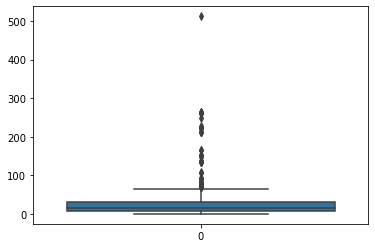

In [152]:
sns.boxplot(data = X_test_final.Fare)
plt.show()

**Observations :**: 
presence de beaucoup d'outliers donc on remplace par la **mediane**

In [153]:
#1. imputing
X_test_final.Fare.fillna(X_test_final.Fare.median(), inplace=True)

In [154]:
#2. Encodage 
X_test_final[['Sex','Embarked']] = enc.fit_transform(X_test_final[['Sex','Embarked']])

In [155]:
#3. Normalisation : 
normalized_test_final = (X_test_final-X_train.mean())/X_train.std()

In [195]:
#on remet les valeurs qui n'auraient pas du etre normalisée (cad toutes sauf Fare): 
normalized_test_final[var_cat_final] = X_test_final[var_cat_final]

In [178]:
#4. Prediction 

In [196]:
param_grid = {'C':np.linspace(0.1,1,100), }             

In [197]:
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                   scoring=make_scorer(accuracy_score))

In [198]:
grid.fit(X = normalized_train, y= y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ])},
             scoring=make_scorer(accuracy_score))

In [199]:
model = grid.best_estimator_

In [200]:
predict_final = model.predict(normalized_test_final)

In [201]:
Data_final_ = pd.DataFrame({"Survived": predict_final}, index=titanic_test.PassengerId)
Data_final_.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [202]:
#export en csv : 
Data_final_.to_csv(path_or_buf='Export_final_titanic_LogisticRegression.csv', 
                   header=True, sep= ',',)

Scoring  sur kaggle : **0.76076**